In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)
tf.get_logger().setLevel("ERROR")
tf.autograph.set_verbosity(0)
%matplotlib inline

2025-07-05 18:42:03.581069: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-05 18:42:03.593435: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751722923.605711  336198 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751722923.609724  336198 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751722923.620802  336198 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
data = np.loadtxt('./data/data_w3_ex1.csv', delimiter=',')

x, y = data[:,0], data[:,1]

print(x.shape, y.shape)

(50,) (50,)


In [3]:
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

print(x.shape, y.shape)

(50, 1) (50, 1)


In [4]:
xtr, xtt, ytr, ytt = train_test_split(x, y, test_size=0.4, random_state=1)
xcv, xtt, ycv, ytt = train_test_split(xtt, ytt, test_size=0.5, random_state=1)

In [5]:
print(xtr.shape, ytr.shape)
print(xtt.shape, ytt.shape)
print(xcv.shape, ycv.shape)

(30, 1) (30, 1)
(10, 1) (10, 1)
(10, 1) (10, 1)


In [6]:
scalar = StandardScaler()
xtr_n = scalar.fit_transform(xtr)

In [7]:
scalar.mean_.squeeze()

array(2504.06)

In [8]:
scalar.scale_.squeeze()

array(574.85)

In [9]:
linear = LinearRegression()

linear.fit(xtr_n,ytr)

LinearRegression()

In [10]:
yhat = linear.predict(xtr_n)
print(mean_squared_error(ytr, yhat)/2)

406.19374192533155


In [11]:
mse = 0
for i in range(len(ytr)):
    mse += (yhat[i] - ytr[i])**2
mse /= 2*(len(ytr))

mse

array([406.19])

In [12]:
xcv_n = scalar.transform(xcv)

yhat_cv = linear.predict(xcv_n)

In [13]:
mean_squared_error(yhat_cv, ycv)/2

551.7789026952216

In [14]:
mse_cv = 0
for i in range(len(ycv)):
    mse_cv += (yhat_cv[i] - ycv[i])**2
mse_cv /= 2*(len(ycv))

mse_cv

array([551.78])

In [15]:
poly = PolynomialFeatures(degree=2, include_bias=False)
xtr_p = poly.fit_transform(xtr)

In [16]:
scalar_poly = StandardScaler()
xtr_p_n = scalar_poly.fit_transform(xtr_p)

In [17]:
linear_p = LinearRegression()
linear_p.fit(xtr_p_n, ytr)

LinearRegression()

In [18]:
yhat_p = linear_p.predict(xtr_p_n)
print(mean_squared_error(yhat_p, ytr)/2)

49.111609334025154


In [19]:
xcv_p = poly.transform(xcv)
xcv_p_n = scalar_poly.transform(xcv_p)
yhay_p_cv = linear_p.predict(xcv_p_n)
print(mean_squared_error(yhay_p_cv, ycv)/2)

87.6984121111191


In [20]:
def plot_train_cv_mses(degrees, train_mses, cv_mses, title):
    degrees = range(1,11)
    plt.plot(degrees, train_mses, marker='o', c='r', label='training MSEs'); 
    plt.plot(degrees, cv_mses, marker='o', c='b', label='CV MSEs'); 
    plt.title(title)
    plt.xlabel("degree"); 
    plt.ylabel("MSE"); 
    plt.legend()
    plt.show()

In [21]:
t_mse = []
c_mse = []
models = []
polys = []
norms = []

for degree in range(1,11):
    poly1 = PolynomialFeatures(degree, include_bias=False)
    xtrp = poly1.fit_transform(xtr)
    polys.append(poly1)

    scalarp = StandardScaler()
    xtrpn = scalarp.fit_transform(xtrp)
    norms.append(scalarp)

    linearp = LinearRegression()
    linearp.fit(xtrpn, ytr)
    models.append(linearp)

    yhatt = linearp.predict(xtrpn)
    tmse = mean_squared_error(yhatt, ytr)/2
    t_mse.append(tmse)

    xcvp = poly1.transform(xcv)
    xcvpn = scalarp.transform(xcvp)
    yhatc = linearp.predict(xcvpn)
    cmse = mean_squared_error(yhatc, ycv)/2
    c_mse.append(cmse)

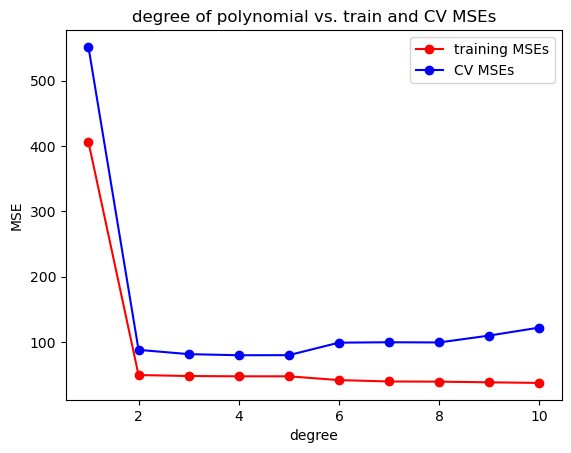

In [22]:
degrees = range(1,11)
plot_train_cv_mses(degrees, t_mse, c_mse, title="degree of polynomial vs. train and CV MSEs")

In [23]:
print(np.argmin(c_mse)+1)

4


In [24]:
xttp = polys[3].transform(xtt)
xttpn = norms[3].transform(xttp)

yhate = models[3].predict(xttpn)

print(mean_squared_error(yhate, ytt)/2)

104.63168205290594


In [25]:
def build_models():
    tf.random.set_seed(20)

    model1 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(25, activation="relu"),
        tf.keras.layers.Dense(15, activation="relu"),
        tf.keras.layers.Dense(1, activation='linear'),
    ])

    model2 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(20, activation="relu"),
        tf.keras.layers.Dense(12, activation="relu"),
        tf.keras.layers.Dense(12, activation="relu"),
        tf.keras.layers.Dense(20, activation="relu"),
        tf.keras.layers.Dense(1, activation='linear'),
    ])

    model3 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(8, activation="relu"),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(12, activation="relu"),
        tf.keras.layers.Dense(1, activation='linear'),
    ])

    model_list = [model1, model2, model3]
    return model_list

In [26]:
degree = 1
poly2 = PolynomialFeatures(degree, include_bias=False)
scalar2 = StandardScaler()

xtrp = poly2.fit_transform(xtr)
xcvp = poly2.transform(xcv)
xttp = poly2.transform(xtt)

xtrpn = scalar2.fit_transform(xtrp)
xcvpn = scalar2.transform(xcvp)
xttpn = scalar2.transform(xttp)

In [27]:
nn_t_mse = []
nn_c_mse = []

models = build_models()

for model in models:
    model.compile(
        loss = "mse",
        optimizer = tf.keras.optimizers.Adam(0.1)
    )
    print(model.name)
    model.fit(xtrpn, ytr, epochs=300, verbose=0)
    print("Done!")

    yhat = model.predict(xtrpn)
    tmse = mean_squared_error(yhat, ytr)/2
    nn_t_mse.append(tmse)

    yhat = model.predict(xcvpn)
    cmse = mean_squared_error(yhat, ycv) / 2
    nn_c_mse.append(cmse)

print("Outcome")
for model in range(len(nn_t_mse)):
    print(f"Model: {model}, MSE: {nn_t_mse[model]:0.2f}, CV MSE: {nn_c_mse[model]:0.2f}")

I0000 00:00:1751722925.740880  336198 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


sequential


I0000 00:00:1751722926.511516  336281 service.cc:152] XLA service 0x78ebbc005510 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751722926.511566  336281 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-07-05 18:42:06.525768: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1751722926.597559  336281 cuda_dnn.cc:529] Loaded cuDNN version 90701
I0000 00:00:1751722927.218281  336281 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Done!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
sequential_1
Done!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
sequential_2
Done!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
Outcome
Model: 0, MSE: 405.78, CV MSE: 551.51
Model: 1, MSE: 73.62, CV MSE: 113.14
Model: 2, MSE: 73.67, CV MSE: 110.59


In [28]:
yhat1 = models[2].predict(xttpn)
test_mse1 = mean_squared_error(yhat1,ytt) / 2

yhat2 = models[1].predict(xttpn)
test_mse2 = mean_squared_error(yhat2,ytt) / 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [29]:
print(test_mse1, test_mse2)

132.2874162680566 132.41108177898948


#### Classification

In [30]:
probs = np.array([0.2, 0.6, 0.7, 0.3, 0.8])

preds = np.where(probs >= 0.5, 1, 0)

y_true = np.array([1,1,1,1,1])

misclassified = 0

num_preds = len(preds)

for i in range(num_preds):
    if preds[i] != y_true[i]:
        misclassified += 1

fract_err = misclassified / num_preds

In [31]:
print(f"probabilities: {probs}")
print(f"predictions with threshold=0.5: {preds}")
print(f"targets: {y_true}")
print(f"fraction of misclassified data (for-loop): {fract_err}")
print(f"fraction of misclassified data (with np.mean()): {np.mean(preds != y_true)}")

probabilities: [0.2 0.6 0.7 0.3 0.8]
predictions with threshold=0.5: [0 1 1 0 1]
targets: [1 1 1 1 1]
fraction of misclassified data (for-loop): 0.4
fraction of misclassified data (with np.mean()): 0.4


In [32]:
def build_c_models():
    tf.random.set_seed(20)

    model1 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(25, activation="relu"),
        tf.keras.layers.Dense(15, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ])

    model2 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(20, activation="relu"),
        tf.keras.layers.Dense(12, activation="relu"),
        tf.keras.layers.Dense(12, activation="relu"),
        tf.keras.layers.Dense(20, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ])

    model3 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(8, activation="relu"),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(12, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ])

    model_list = [model1, model2, model3]
    return model_list

In [33]:
data = np.loadtxt("./data/data_w3_ex2.csv", delimiter=',')

xc = data[:,:-1]
yc = data[:,-1]

yc = np.expand_dims(yc, axis=1)

print(xc.shape, yc.shape)

(200, 2) (200, 1)


In [34]:
xctr, x_, yctr, y_ = train_test_split(xc, yc, test_size=0.4, random_state=1)
xccv, xctt, yccv, yctt = train_test_split(x_, y_, test_size=0.5, random_state=1)

del x_, y_

print(xctr.shape, yctr.shape)
print(xccv.shape, yccv.shape)
print(xctt.shape, yctt.shape)

(120, 2) (120, 1)
(40, 2) (40, 1)
(40, 2) (40, 1)


In [35]:
scalar_c = StandardScaler()

xctr_c = scalar_c.fit_transform(xctr)
xccv_c = scalar_c.transform(xccv)
xctt_c = scalar_c.transform(xctt)

In [36]:
nn_t_err = []
nn_c_err = []

models_c = build_models()

for model in models_c:
    model.compile(
        loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
        optimizer = tf.keras.optimizers.Adam(0.01)
    )
    print(model.name)
    model.fit(xctr_c, yctr, epochs=200, verbose=0)
    print("Done!")

    threshold = 0.5
    
    yhat = model.predict(xctr_c)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold,1,0)
    t_err = np.mean(yhat != yctr)
    nn_t_err.append(t_err)

    yhat = model.predict(xccv_c)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold,1,0)
    c_err = np.mean(yhat != yccv)
    nn_c_err.append(c_err)

print("Outcome")
for model in range(len(nn_t_err)):
    print(f"Model: {model}, Train Err: {nn_t_err[model]:0.5f}, CV MSE: {nn_c_err[model]:0.5f}")

sequential_3
Done!
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
sequential_4
Done!
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
sequential_5
Done!
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
Outcome
Model: 0, Train Err: 0.03333, CV MSE: 0.12500
Model: 1, Train Err: 0.04167, CV MSE: 0.17500
Model: 2, Train Err: 0.03333, CV MSE: 0.17500


In [40]:
yhat = models_c[2].predict(xctt_c)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
test_err = np.mean(yhat != yctt)

print(test_err)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0.15
